# DTSA5509 Final Project #
## Project Topic ##
## Data ##

Will be trying to model the data with 'traditional' Logistic Regression, (Pruned) Decision Tree, ensemble method AdaBoost and Support Vector Machine models.
## Data Cleaning ##

In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt

path = r'C:\Users\nikok\OneDrive\Documents\Opiskelu\MSEE\24 DTSA 5509 Introduction to Machine Learning Supervised Learning\Week 7\Datasets\Pima Indians Diabetes Database'
datafile = 'diabetes.csv'

df = pd.read_csv(path+'\\'+datafile)

#print(df.head)
#print(df.columns[0])
#print(df.dtypes)
print(df.info())
print(df.describe())

for c in df.columns[0:]:
    print(c, df[c].unique())

#df['age'] = pd.to_numeric(df['age'], errors='coerce')
print('\nAny NaN values:\n', df.isna().any())
print('\nAny Zero values:\n', df[df==0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [19]:
for column in df.columns:
    print('Zero values in ' + column + ':', sum(df[column]==0))

np.logical_and  df==0

Zero values in Pregnancies: 111
Zero values in Glucose: 5
Zero values in BloodPressure: 35
Zero values in SkinThickness: 227
Zero values in Insulin: 374
Zero values in BMI: 11
Zero values in DiabetesPedigreeFunction: 0
Zero values in Age: 0
Zero values in Outcome: 500


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,True
764,False,False,False,False,True,False,False,False,True
765,False,False,False,False,False,False,False,False,True
766,False,False,False,True,True,False,False,False,False


### Dataset info ###

 Feature explanations as stated on the Kaggle page

* Age: Age of the patient
* Sex: Sex of the patient
* exang: exercise induced angina
    * Value 1: Yes
    * Value 0: No
* ca: number of major vessels (0-3)
* cp: Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps: resting blood pressure (in mm Hg)
* chol: cholestoral in mg/dl fetched via BMI sensor
* fbs: (fasting blood sugar > 120 mg/dl) 
    * Value 1: true
    * Value 0: false
* rest_ecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* target: 
    * Value 0: less chance of heart attack 
    * Value 1: more chance of heart attack

## Exploratory Data Analysis ##

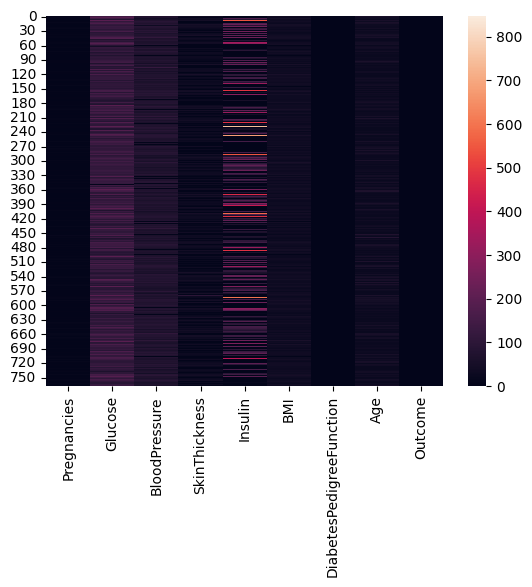

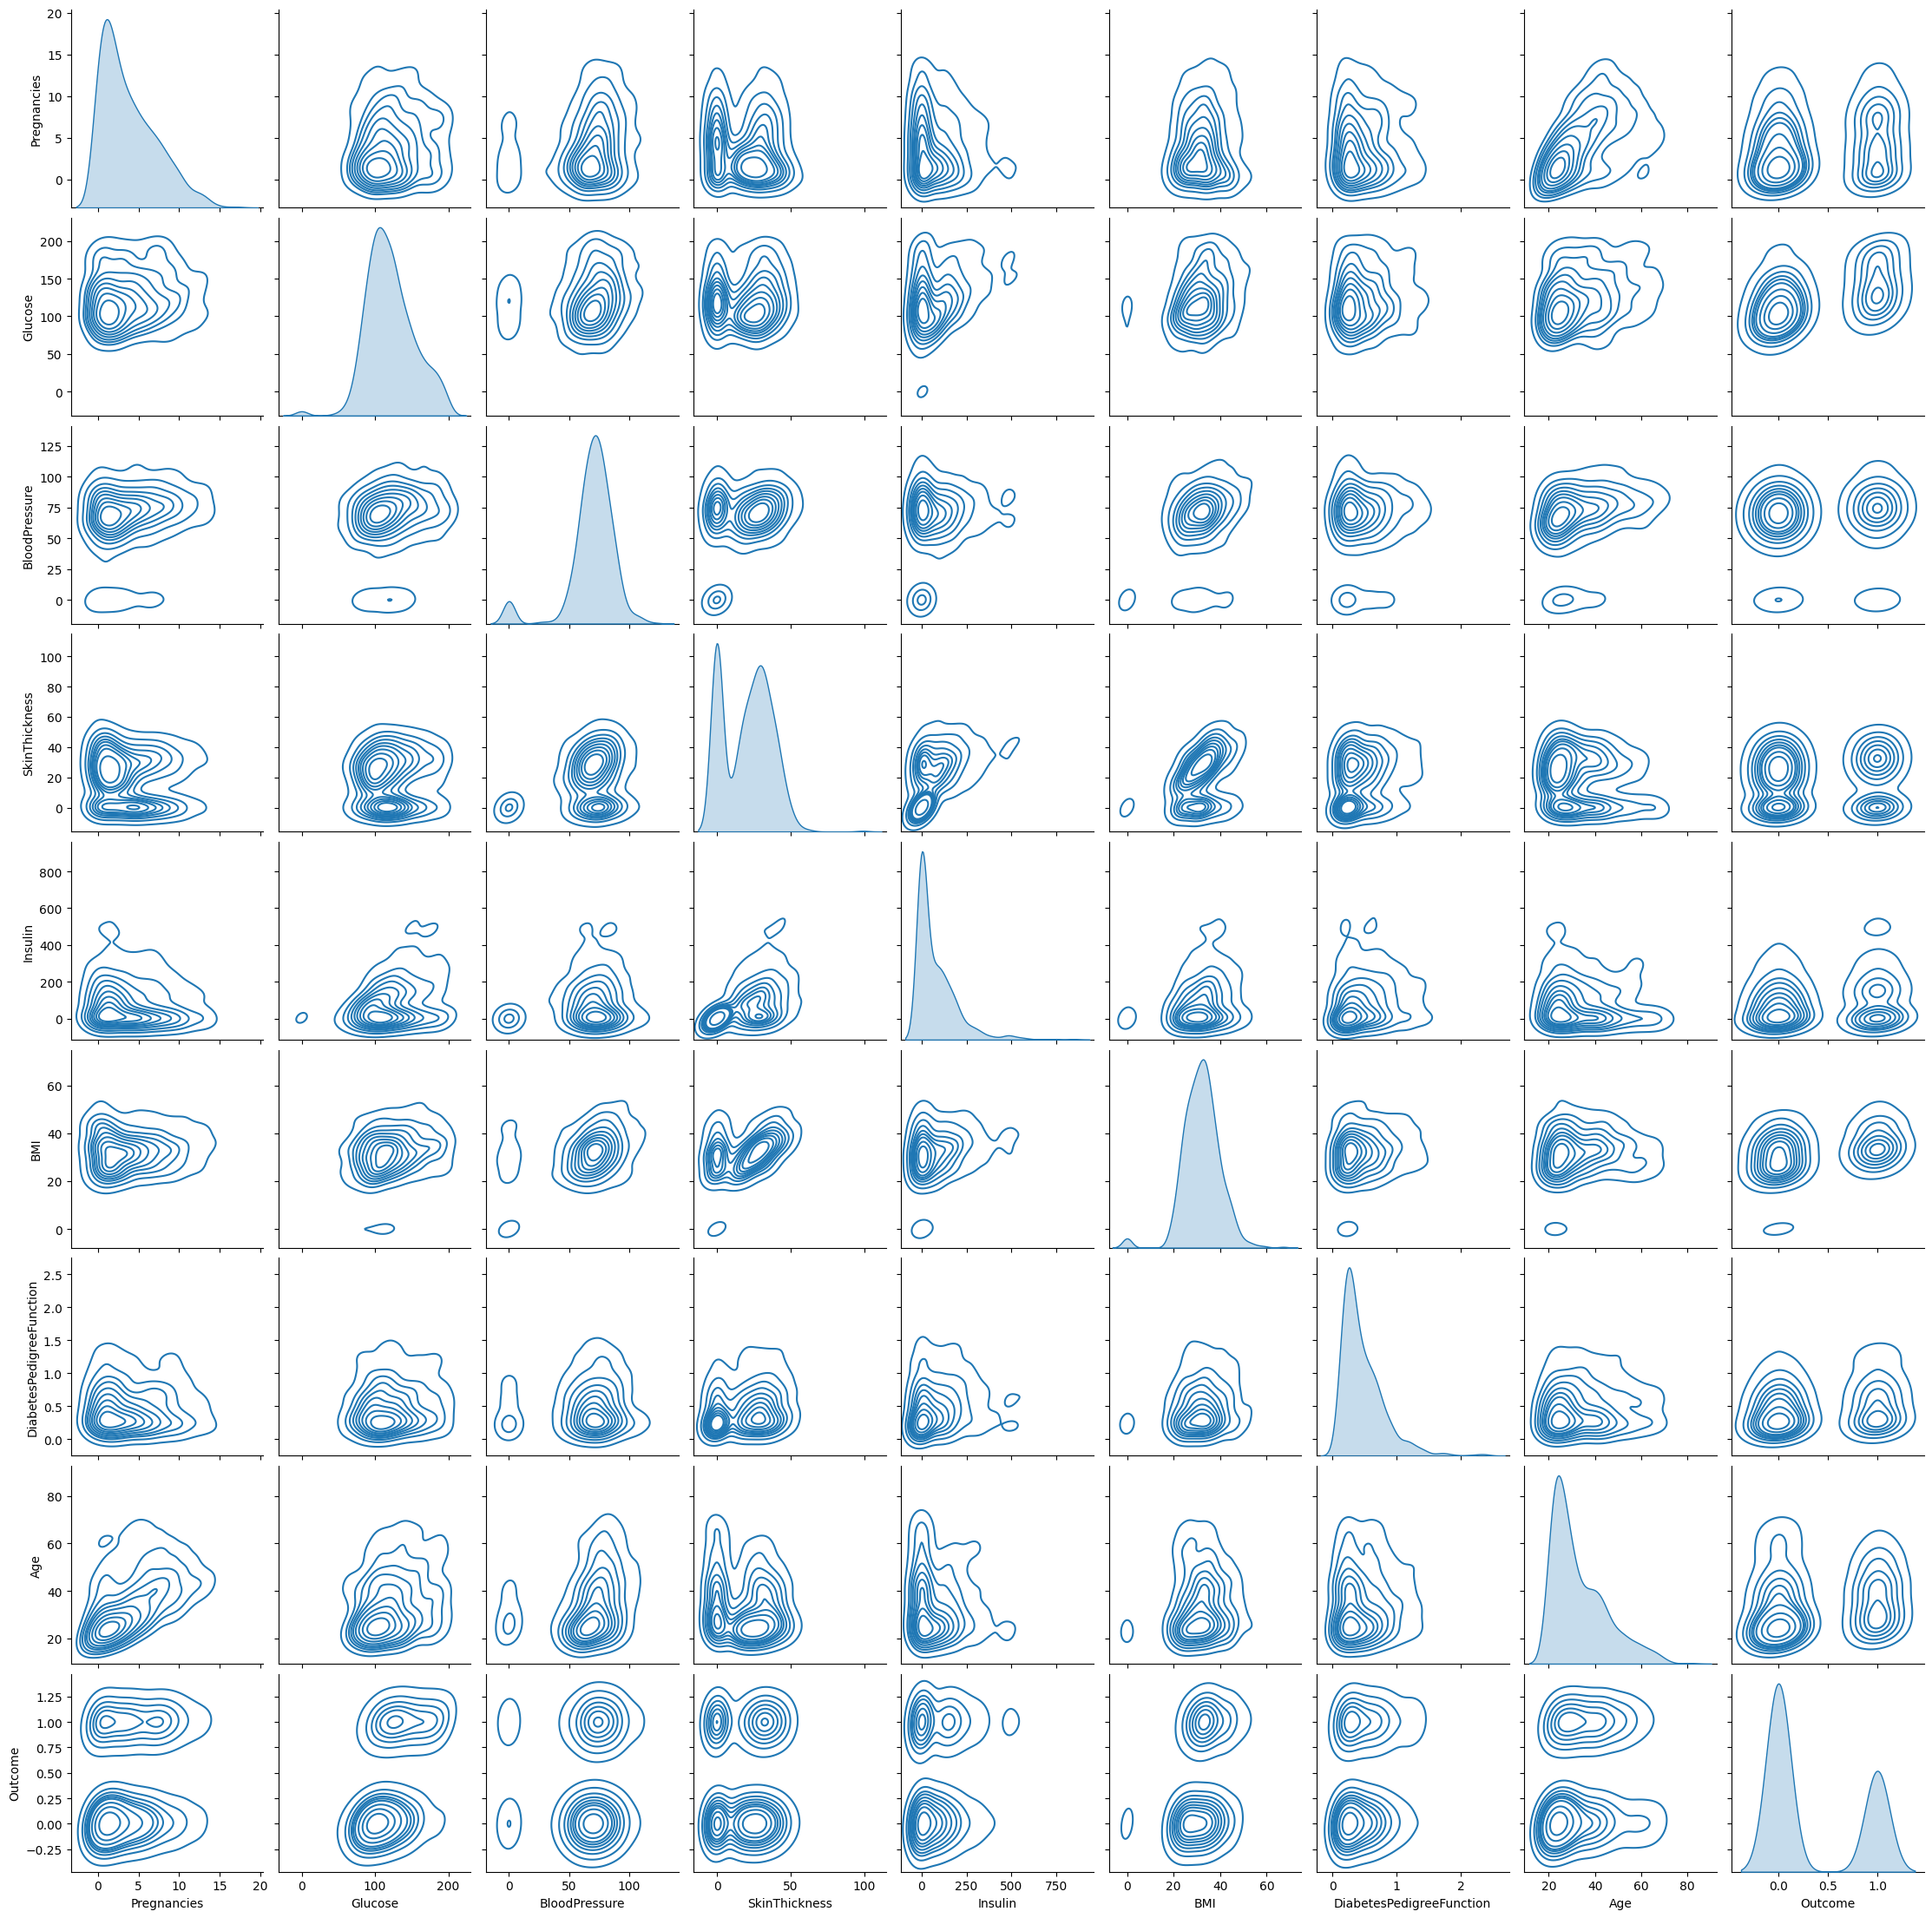

In [2]:
import seaborn as sns
df.corr()
sns.heatmap(df)
sns.pairplot(df, kind='kde')


### Prepare training and test sets ###

Making a 80-20 split for training and test sets.

In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2)

print('The length of training set:', len(df_train), '\nThe length of testing set:', len(df_test))
y_train = df_train['outcome']
X_train = df_train.drop(columns='outcome', inplace=False)
y_test = df_test['outcome']
X_test = df_test.drop(columns='outcome', inplace=False)


The length of training set: 614 
The length of testing set: 154


KeyError: 'outcome'

## Models ##
### Logistic regression model


In [65]:
from sklearn.linear_model import LogisticRegression
myLogReg = LogisticRegression(penalty='l2', class_weight='balanced', solver='liblinear').fit(X_train, y_train)
myLogReg.score(X_test, y_test)

0.8032786885245902

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

class calc_metrics:
    def __init__(self, y_test, y_pred):
        self.confusion_matrix = None
        self.accuracy = None
        self.f1_score = None
        self.precision = None
        self.recall = None

        self.get_metrics(y_test, y_pred)

    def get_metrics(self, y_test, y_pred):
        self.confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[0,1]))
        self.accuracy = accuracy_score(y_test, y_pred)
        self.f1_score = f1_score(y_test, y_pred)
        self.precision = precision_score(y_test, y_pred)
        self.recall = recall_score(y_test, y_pred)
        print('Confusion matrix:')
        print(self.confusion_matrix)
        print('Accuracy:', round(self.accuracy, 3))
        print('F1-score:', round(self.f1_score,3))
        print('Precision:', round(self.precision,3))
        print('Recall:', round(self.recall,3))

y_hat_LogReg = myLogReg.predict(X_test)
LogReg_metrics = calc_metrics(y_test, y_hat_LogReg)


Confusion matrix:
    0   1
0  23  11
1   1  26
Accuracy: 0.803
F1-score: 0.812
Precision: 0.703
Recall: 0.963
0.8032786885245902


## Decision Tree ##
Decision tree hyperparameters:
* Max depth
* CCP alpha

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

DT_grid_paras = {'max_depth':range(1,10), 'ccp_alpha':range(0, 9), 'min_samples_leaf':range(1,9)}
myDT_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=DT_grid_paras, scoring=None, n_jobs=None, refit=True, cv=3, verbose=0, pre_dispatch='2*n_jobs', return_train_score=True)
myDT_grid = myDT_grid.fit(X_train, y_train)
print('Best parameters:', myDT_grid.best_params_)
print('Validation accuracy:', myDT_grid.best_score_)

##myDT = DecisionTreeClassifier(random_state=0, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, ccp_alpha=ccp_alpha)
myDT = myDT_grid.best_estimator_
myDT.fit(X_train, y_train)
y_hat_DT = myDT.predict(X_test)
DT_metrics = calc_metrics(y_test, y_hat_DT)


#RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)



Best parameters: {'ccp_alpha': 0, 'max_depth': 4, 'min_samples_leaf': 4}
Validation accuracy: 0.8015946502057614
Confusion matrix:
    0   1
0  23  11
1   3  24
Accuracy: 0.77
F1-score: 0.774
Precision: 0.686
Recall: 0.889


## AdaBoost ##
Since AdaBoost algorithm was already coded as a part of the homework, AdaBoostClassifier from sklearn is used here. 

In [108]:
from sklearn.ensemble import AdaBoostClassifier

myAdaBoost = AdaBoostClassifier(estimator=None, n_estimators=500, learning_rate=0.10, algorithm='SAMME', random_state=None)
myAdaBoost.fit(X_train, y_train)

y_hat_AdaBoost = myAdaBoost.predict(X_test)
AdaBoost_metrics = calc_metrics(y_test, y_hat_AdaBoost)


Confusion matrix:
    0   1
0  22  12
1   3  24
Accuracy: 0.754
F1-score: 0.762
Precision: 0.667
Recall: 0.889


## SVM ##
Support Vector Machine -model

In [125]:
from sklearn.svm import SVC


C = 10
gamma = 'scale'
myNLSVM = SVC(C=C, kernel='rbf', gamma=gamma)
myNLSVM.fit(X_train, y_train)
y_hat_SVM = myNLSVM.predict(X_test)
calc_metrics(y_test, y_hat_SVM)

SVC_grid_paras = {'C':np.logspace(-5, 5, num=11 , base=2), 'gamma':np.logspace(-5, 5, num=11 , base=2)}
my_SVC_grid = GridSearchCV(estimator=SVC(), param_grid=SVC_grid_paras, scoring=None, n_jobs=None, refit=True, cv=3, verbose=0, pre_dispatch='2*n_jobs', return_train_score=True)
my_SVC_grid = my_SVC_grid.fit(X_train, y_train)
print('Best parameters:', my_SVC_grid.best_params_)
print('Validation accuracy:', my_SVC_grid.best_score_)

y_hat_SVC = my_SVC_grid.best_estimator_.predict(X_test)
SVC_metrics = calc_metrics(y_test, y_hat_SVC)


Confusion matrix:
    0   1
0  14  20
1   7  20
Accuracy: 0.557
F1-score: 0.597
Precision: 0.5
Recall: 0.741
Best parameters: {'C': np.float64(2.0), 'gamma': np.float64(0.03125)}
Validation accuracy: 0.5992283950617284
Confusion matrix:
   0   1
0  3  31
1  0  27
Accuracy: 0.492
F1-score: 0.635
Precision: 0.466
Recall: 1.0


## Results and Analysis ##

## Discussion and conculsion ##
